<a href="https://colab.research.google.com/github/bahromomonov/transportlarni-farqlovchi-model/blob/main/Modelipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai


In [ ]:
!pip install fastai==2.5.3

In [ ]:
!git clone "https://github.com/EscVM/OIDv4_ToolKit.git"

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200

##Model


In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets 
#path
path=Path('train')
#path.ls()
#fls=get_image_files(path)
#fls
#failed=verify_images(path)
#failed
transport=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
dls=transport.dataloaders(path)
dls.train.show_batch(max_n=32,nrows=4)
learn =cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

In [8]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Boat
Ehtimollik:100.0%


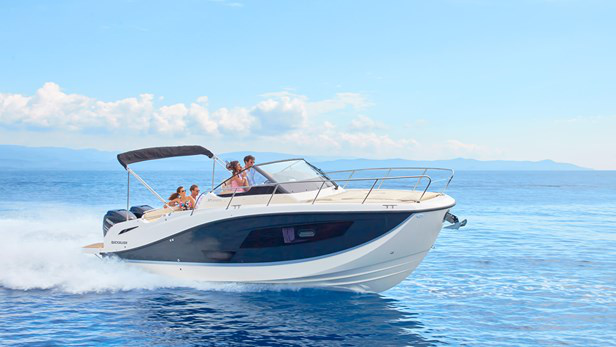

In [18]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.1f}%")
img